# **Solution to PSet 7**

> provided and graded by Xuntao Wu

[:material-download: Download this notebook](./sol7.ipynb)

In [26]:
# Import required libraries
import numpy as np
from math import ceil
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Math
from datetime import datetime
from pytz import timezone

# Install and import QuTiP if needed
try:
    from qutip import *
except ImportError:
    %pip install qutip
    from qutip import *

# Configure matplotlib for LaTeX rendering
plt.rcParams.update(
    {
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsmath} \usepackage{physics}",
        "font.family": "serif",
    }
)
%config InlineBackend.figure_format = 'svg'

# Print version and execution time info
print(f"QuTiP version: {qutip.__version__}")
print(
    "Time of execution: ",
    datetime.now(timezone("America/Chicago")).strftime("%Y-%m-%d %H:%M:%S"),
)

QuTiP version: 5.1.1
Time of execution:  2025-05-28 13:25:54


In [27]:
from math import *
import cmath

## **Problem 7-1 [16 points]**  

The Cooper Pair Box

Let’s numerically study the behavior of the Cooper Pair Box (CBP) in three different regimes (charge qubit - quantronium - transmon). In the charge basis the Hamiltonian is given by:

$$
\mathcal{H} = 4E_C(\hat{n} - n_g)^2 - \frac{E_J}{2} \sum_n \ket{n+1} \bra{n} + \ket{n} \bra{n+1},
$$

with  $E_C = \frac{e^2}{2C}$ the single electron charging energy,  $E_J$ the Josephson energy, and  $n_g = \frac{C V_g}{2e}$ is the gate voltage expressed in units of Cooper pairs.

As stated the sum runs over all charges, so we’ll have to make an approximation by only considering a few Cooper pair charge states, between $\pm N_c$ the number of charges. You can experiment to see how few you can get away with and still get a good result. Also Joules is not a natural experimental unit so divide by $h$ and express all energies in this Pset in terms of GHz.

### **a. [2 points]**  
In QuTiP construct the $\hat{n} = n \ket{n} \bra{n}$ operator. This should be a diagonal matrix with the $n$’s on the diagonal from $-N_c$ to $+N_c$.

---

**Note:** We should choose the cutoff dimension $N_c$ much larger than $n_g$, otherwise you may get unphysical outcomes due to the finite cutoff issue (as in this question all the plots are supposed to be periodical in $n_g$).

In [28]:
Nc = 10
Dim = 2 * Nc + 1

In [ ]:
n_list = np.arange(-Nc, Nc + 1)
N_op = Qobj(np.diag(n_list))
N_op

$$
\left(\begin{array}{cc}-10 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & -9 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 0 & -8 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & -7 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & -6 & \cdots & 0 & 0 & 0 & 0 & 0\\\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots\\0 & 0 & 0 & 0 & 0 & \cdots & 6 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 7 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 8 & 0 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 9 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 10\end{array}\right)
$$

### **b. [2 points]**  
Now construct the full electrostatic term $4E_c(\hat{n} - n_g)^2$. *(Note that when we write $n_g$ in operator language we mean $n_g \mathbb{1}$ where $\mathbb{1}$ is the identity.)*

---

In [ ]:
def Hc(Ec, ng):
    H = 4 * Ec * (N_op - ng * identity(Dim)) ** 2
    return H

Hc(1, 0.4)  # print the electrostatic term when Ec = 1 GHz, ng = 0.4

$$
\left(\begin{array}{cc}432.640 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 353.440 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 0 & 282.240 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 219.040 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 163.840 & \cdots & 0 & 0 & 0 & 0 & 0\\\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots\\0 & 0 & 0 & 0 & 0 & \cdots & 125.440 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 174.240 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 231.040 & 0 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 295.840 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 368.640\end{array}\right)
$$

### **c. [2 points]**  
Construct the Josephson coupling operator (the second term in the Hamiltonian), which will consist of couplings between adjacent charge states.

---

In [ ]:
def HJ(EJ):
    H = np.diag(np.ones(Dim - 1), 1) + np.diag(np.ones(Dim - 1), -1)
    return -EJ/2 * Qobj(H)

HJ(2)  # print the Josephson coupling term when EJ = 2 GHz

$$
\left(\begin{array}{cc}0 & -1 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\-1 & 0 & -1 & 0 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & -1 & 0 & -1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 0 & -1 & 0 & -1 & \cdots & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & -1 & 0 & \cdots & 0 & 0 & 0 & 0 & 0\\\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \vdots\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & -1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & -1 & 0 & -1 & 0 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & -1 & 0 & -1 & 0\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & -1 & 0 & -1\\0 & 0 & 0 & 0 & 0 & \cdots & 0 & 0 & 0 & -1 & 0\end{array}\right)
$$

### **d. [2 points]**  
Add the results of **b** and **c** together to get a full Hamiltonian and find the eigenvalues and eigenvectors of this as a function of $E_J$, $E_C$, and $n_g$. Plot the first 5 energy levels as a function of $n_g$ for the following parameters:

- $E_J = 5$ GHz, $E_C = 20$ GHz (charge qubit regime)
- $E_J = 5$ GHz, $E_C = 5$ GHz (quantronium regime)
- $E_J = 5$ GHz, $E_C = 0.5$ GHz (transmon regime)

Take care to plot everything on the same energy scale so it is easy to compare.

---

**charge qubit regime: EJ = 5 GHz, Ec = 20 GHz**

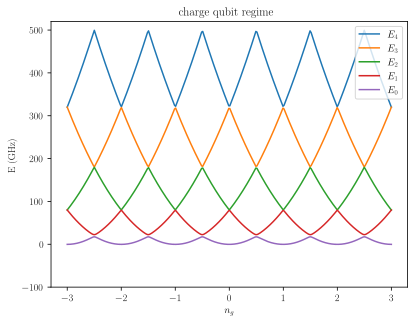

In [32]:
ng_list = np.linspace(-3, 3, 300)

result_d1 = []

labels = [r"$E_0$", r"$E_1$", r"$E_2$", r"$E_3$", r"$E_4$"]

for ng in ng_list:
    H = Hc(20, ng) + HJ(5)  # EJ = 5 GHz, Ec = 20 GHz
    result_d1 = np.append(result_d1, H.eigenenergies())

result_d1 = np.reshape(result_d1, (ng_list.size, Dim))

for k in range(5):
    plt.plot(ng_list, result_d1[:, 4 - k], label=labels[4 - k])

plt.xlabel(r"$n_g$")
plt.ylabel(r"E (GHz)")
plt.title("charge qubit regime")
plt.ylim(-100, 520)
plt.legend()
plt.show()

**quantronium regime: EJ = 5 GHz, Ec = 5 GHz**

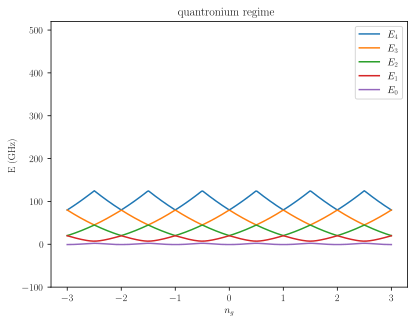

In [33]:
result_d2 = []

for ng in ng_list:
    H = Hc(5, ng) + HJ(5)  # EJ = 5 GHz, Ec = 5 GHz
    result_d2 = np.append(result_d2, H.eigenenergies())

result_d2 = np.reshape(result_d2, (ng_list.size, Dim))

for k in range(5):
    plt.plot(ng_list, result_d2[:, 4 - k], label=labels[4 - k])

plt.xlabel(r"$n_g$")
plt.ylabel(r"E (GHz)")
plt.title("quantronium regime")
plt.ylim(-100, 520)
plt.legend()
plt.show()

**transmon regime: EJ = 50 GHz, Ec = 0.5 GHz**

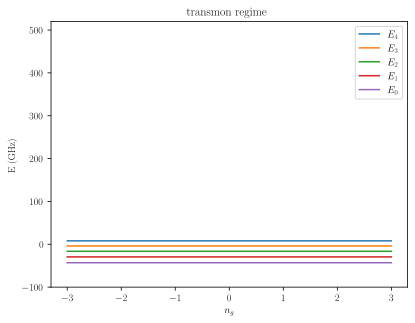

In [34]:
result_d3 = []

for ng in ng_list:
    H = Hc(0.5, ng) + HJ(50)  # EJ = 50 GHz, Ec = 0.5 GHz
    result_d3 = np.append(result_d3, H.eigenenergies())

result_d3 = np.reshape(result_d3, (ng_list.size, Dim))

for k in range(5):
    plt.plot(ng_list, result_d3[:, 4 - k], label=labels[4 - k])

plt.xlabel(r"$n_g$")
plt.ylabel(r"E (GHz)")
plt.title("transmon regime")
plt.ylim(-100, 520)
plt.legend()
plt.show()

To solve the eigenstates and the corresponding eigenvalues, let me take the quantronium regime as an example (EJ = 5 GHz, Ec = 5 GHz), and I choose $n_g = 0.5$.

In [ ]:
H = Hc(5, 0.5) + HJ(5)
H.eigenstates()

(array([   2.35327177,    7.33383421,   45.06859919,   45.08803464,
         125.02604505,  125.02604717,  245.01302133,  245.01302133,
         405.0078126 ,  405.0078126 ,  605.00520836,  605.00520836,
         845.00372025,  845.00372025, 1125.00279018, 1125.00279018,
        1445.00217014, 1445.00217054, 1805.0017364 , 1805.01736072,
        2205.01562471]),
 array([Quantum object: dims=[[21], [1]], shape=(21, 1), type='ket', dtype=Dense
        Qobj data =
        [[4.04009909e-24]
         [3.55956441e-21]
         [2.56665082e-18]
         [1.48110460e-15]
         [6.65100328e-13]
         [2.24176365e-10]
         [5.40389960e-08]
         [8.70322580e-06]
         [8.44669667e-04]
         [4.14296852e-02]
         [7.05891541e-01]
         [7.05891541e-01]
         [4.14296852e-02]
         [8.44669667e-04]
         [8.70322580e-06]
         [5.40389960e-08]
         [2.24176365e-10]
         [6.65100328e-13]
         [1.48110460e-15]
         [2.56665082e-18]
         [3.55

### **e. [2 points]**  
Plot the transition frequency $E_{01}$ as a function of $n_g$. Notice that the maximum is at integer $n_g$ and the minima are at half-integer $n_g$.

---

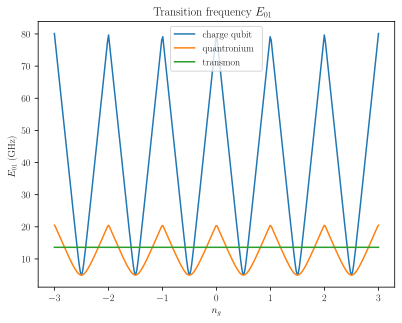

In [36]:
E01_1 = result_d1[:, 1] - result_d1[:, 0]  # charge qubit
E01_2 = result_d2[:, 1] - result_d2[:, 0]  # quantronium
E01_3 = result_d3[:, 1] - result_d3[:, 0]  # transmon

plt.plot(ng_list, E01_1, label="charge qubit")
plt.plot(ng_list, E01_2, label="quantronium")
plt.plot(ng_list, E01_3, label="transmon")

plt.xlabel(r"$n_g$")
plt.ylabel(r"$E_{01}$ (GHz)")
plt.title(r"Transition frequency $E_{01}$")
plt.legend()
plt.show()

### **f. [2 points]**  
Plot the anharmonicity $\eta = (E_{12} - E_{01})$ as a function of $n_g$.

---

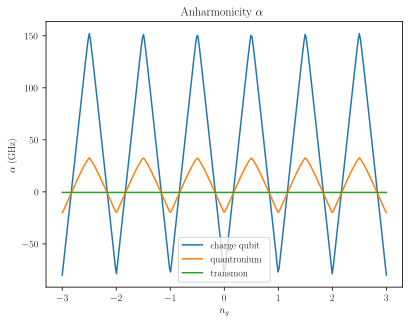

In [37]:
E12_1 = result_d1[:, 2] - result_d1[:, 1]  # charge qubit
alpha_1 = E12_1 - E01_1

E12_2 = result_d2[:, 2] - result_d2[:, 1]  # quantronium
alpha_2 = E12_2 - E01_2

E12_3 = result_d3[:, 2] - result_d3[:, 1]  # transmon
alpha_3 = E12_3 - E01_3

plt.plot(ng_list, alpha_1, label="charge qubit")
plt.plot(ng_list, alpha_2, label="quantronium")
plt.plot(ng_list, alpha_3, label="transmon")

plt.xlabel(r"$n_g$")
plt.ylabel(r"$\alpha$ (GHz)")
plt.title(r"Anharmonicity $\alpha$")
plt.legend()
plt.show()

We can see that, the maximum of $\alpha$ is at $n_g$ half-integer and minima at $n_g$ integer.

### **g. [2 points]**  
Our drive, measurement, and gate speeds will be proportional to the **transition dipole matrix element**.  If we couple via charge (which is typical), then the relevant matrix element is $\langle 0 | \hat{n} | 1 \rangle$.  

To calculate this:

- Take the eigenvectors for the ground and first excited states from part **d**.
- Compute their inner product with the $\hat{n}$ operator from part **a**.
- Plot this matrix element for the three parameter cases in **d**.

---

In calculating $\langle 0|\hat n|1\rangle$, since $H$ is a real symmetric matrix, the eigenvalues and components of eigenstates could be chosen as real numbers, so for simplicity I'll just plot the absolute value of $\langle 0|\hat n|1\rangle$, which will give us meaningful results.

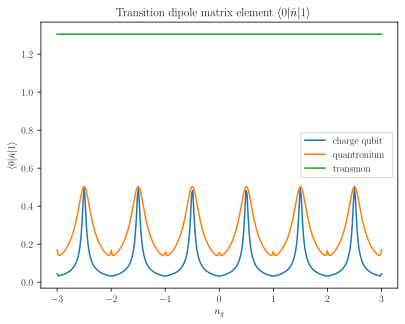

In [38]:
n01_1 = np.zeros(ng_list.size)  # charge qubit
n01_2 = np.zeros(ng_list.size)  # quantronium
n01_3 = np.zeros(ng_list.size)  # transmon

count = 0

for ng in ng_list:
    state_all_1 = (Hc(20, ng) + HJ(5)).eigenstates()  # charge qubit
    n01_1[count] = np.abs(
        N_op.matrix_element(state_all_1[1][0], state_all_1[1][1])
    )  # |<0|n|1>|
    state_all_2 = (Hc(5, ng) + HJ(5)).eigenstates()  # quantronium
    n01_2[count] = np.abs(N_op.matrix_element(state_all_2[1][0], state_all_2[1][1]))
    state_all_3 = (Hc(0.5, ng) + HJ(50)).eigenstates()  # transmon
    n01_3[count] = np.abs(N_op.matrix_element(state_all_3[1][0], state_all_3[1][1]))
    count = count + 1

plt.plot(ng_list, n01_1, label="charge qubit")
plt.plot(ng_list, n01_2, label="quantronium")
plt.plot(ng_list, n01_3, label="transmon")

plt.xlabel(r"$n_g$")
plt.ylabel(r"$\langle 0|\hat n|1\rangle$")
plt.title(r"Transition dipole matrix element $\langle 0|\hat n|1\rangle$")
plt.legend()
plt.show()

We can see that the transmon has the largest dipole element, and it is also insensitive to $n_g$.

### **h. [2 points]**  
Now let’s be more quantitative about how things change as a function of the ratio $E_J/E_C$, while keeping the **“plasma” energy** fixed:  $E_P = \sqrt{8E_C E_J} = 5$ GHz.  Plot the following as a function of $E_J/E_C$:

- $E_{01}$
- $\langle 0 | \hat{n} | 1 \rangle$
- $\eta$

All quantities are evaluated near $n_g \sim 0$ (but offset slightly, e.g., $n_g = 0.001$ or so for numerical stability).  

Also plot the **band dispersion**:

$$
\epsilon_{01} = \left| E_{01}(n_g = 0) - E_{01}(n_g = 1/2) \right|
$$

This tells us the maximum change of the qubit frequency due to charge noise.

---


Here I will denote $t = \frac{E_J}{E_C}$. Since we have already fixed $E_p = \sqrt{8E_CE_J}$, we will have $E_J = E_p \sqrt{t/8}$ and $E_C = E_p/\sqrt{8t}$. For the plot here, I will focus on the range that $t\in [2^{-7},2^7]$.

In [39]:
t_list = 2 ** np.arange(-7.0, 8.0)
Ep = 5
ng = 0.001

E01_t = np.zeros(t_list.size)  # store E01
n01_t = np.zeros(t_list.size)  # store <0|n|1>
alpha_t = np.zeros(t_list.size)  # store alpha

count = 0

for t in t_list:
    EJ = Ep * np.sqrt(t / 8)
    Ec = Ep / np.sqrt(8 * t)
    H = Hc(Ec, ng) + HJ(EJ)
    eigen = H.eigenstates()  # calculate eigenvalues and corresponding eigenstates of H
    E01_t[count] = eigen[0][1] - eigen[0][0]  # calculate E01
    n01_t[count] = np.abs(
        N_op.matrix_element(eigen[1][0], eigen[1][1])
    )  # calculate |<0|n|1>|
    alpha_t[count] = (eigen[0][2] - eigen[0][1]) - (
        eigen[0][1] - eigen[0][0]
    )  # calculate alpha
    count = count + 1

It should be useful to make a **log-log plot** to indicate the relationship between $E_{01}$ and $E_J/E_C$.

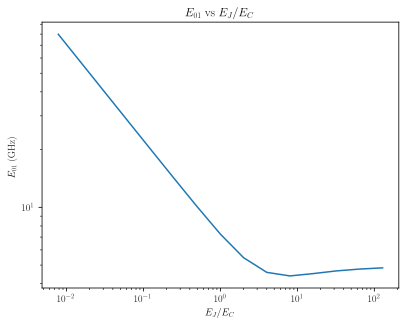

In [40]:
plt.loglog(t_list, E01_t)

plt.xlabel(r"$E_J / E_C$")
plt.ylabel(r"$E_{01}$ (GHz)")
plt.title(r"$E_{01}$ vs $E_J / E_C$")
plt.show()

Still, let us plot a log-log graph for $\langle 0|\hat{n}|1\rangle$.

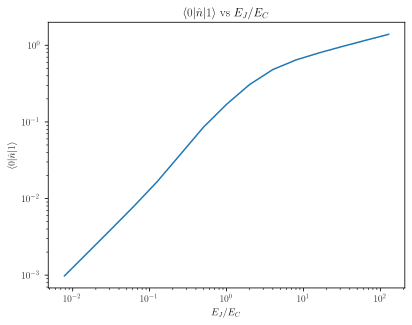

In [41]:
plt.loglog(t_list, n01_t)

plt.xlabel(r"$E_J / E_C$")
plt.ylabel(r"$\langle 0|\hat{n}|1\rangle$")
plt.title(r"$\langle 0|\hat{n}|1\rangle$ vs $E_J / E_C$")
plt.show()

And for $-\alpha$.

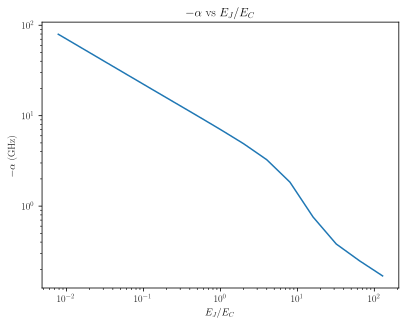

In [42]:
plt.loglog(t_list, -alpha_t)

plt.xlabel(r"$E_J / E_C$")
plt.ylabel(r"$-\alpha$ (GHz)")
plt.title(r"$-\alpha$ vs $E_J / E_C$")
plt.show()

Finally, let us compute the band dispersion $\epsilon_{01} = |E_{01}(n_g = 0) - E_{01}(n_g = 1/2)|$. Here I choose $t\in [2^{-7}, 2^{7}]$. To avoid errors induced by finite-dimension cut-off, I will choose $N_c = 400$ here.

In [43]:
Nc = 400
Dim = 2 * Nc + 1

n_list = np.arange(-Nc, Nc + 1)
N_op = Qobj(np.diag(n_list))


def Hc(Ec, ng):
    H = 4 * Ec * (N_op - ng * identity(Dim)) ** 2
    return H


def HJ(EJ):
    H = np.diag(np.ones(Dim - 1), 1) + np.diag(np.ones(Dim - 1), -1)
    return -EJ * Qobj(H)

In [44]:
# It takes roughly 30 sec
t_list = 2 ** np.arange(-7, 8.0)
epsi01_t = np.zeros(t_list.size)  # store epsilon_{01}

count = 0

for t in t_list:
    EJ = Ep * np.sqrt(t / 8)
    Ec = Ep / np.sqrt(8 * t)

    H1 = Hc(Ec, 0) + HJ(EJ)
    eigen = (
        H1.eigenstates()
    )  # calculate eigenvalues and corresponding eigenstates of H1
    E010 = eigen[0][1] - eigen[0][0]  # calculate E01(ng = 0)

    H2 = Hc(Ec, 0.5) + HJ(EJ)
    eigen = (
        H2.eigenstates()
    )  # calculate eigenvalues and corresponding eigenstates of H2
    E01h = eigen[0][1] - eigen[0][0]  # calculate E01(ng = 0.5)

    epsi01_t[count] = np.abs(E01h - E010)  # calculate epsilon_{01}
    count = count + 1

Plot in logarithmic scale:

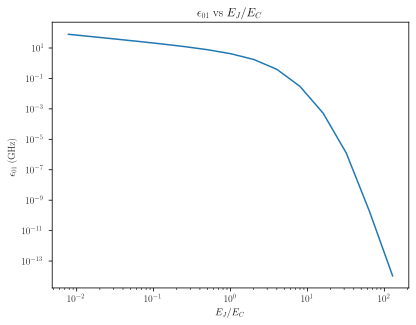

In [45]:
plt.loglog(t_list, epsi01_t)

plt.xlabel(r"$E_J / E_C$")
plt.ylabel(r"$\epsilon_{01}$ (GHz)")
plt.title(r"$\epsilon_{01}$ vs $E_J / E_C$")
plt.show()

It looks like we approach the numerical accuracy limit when $E_J/E_C > 100$.

## **Problem 7-2 [15 points]**  

Let’s prepare a cat state!

Assume we have a cavity now. To have fun, we want to introduce **Kerr nonlinearity** for the cavity (practically achieved by coupling your cavity with other nonlinear devices like transmon qubits).  In the rotating frame, the Hamiltonian is:  

$$
\hat{H} = \frac{\chi}{2} \hat{n}^2 = \frac{\chi}{2} (\hat{a}^\dagger \hat{a})^2
$$

To initialize the cavity, we apply a linear drive to get a **coherent state** $\ket{\alpha}$, which in the Fock basis is:

$$
\ket{\alpha} = e^{-|\alpha|^2/2} \sum_{n=0}^{+\infty} \frac{\alpha^n}{\sqrt{n!}} \ket{n}
$$

Then we let the state evolve under Kerr dynamics:

$$
\ket{\psi(t)} = e^{-i\hat{H}t} \ket{\alpha}
$$

### **a. [3 points]**  
Can you write down $\ket{\psi(t)}$ explicitly under the Fock basis $\{\ket{n}\}$?

---

$$
\begin{aligned}
\hat{H} &= \frac{\chi}{2} \hat{n}^2 \\
|\psi(t)\rangle &= e^{-i \hat{H} t} |\alpha\rangle \\
&= e^{-i \frac{\chi t}{2} \hat{n}^2} \sum_{n=0}^{\infty} e^{-|\alpha|^2/2} \frac{\alpha^n}{\sqrt{n!}} |n\rangle \\
&= e^{-|\alpha|^2/2} \sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}} e^{-i \frac{\chi t}{2} n^2} |n\rangle
\end{aligned}
$$

### **b. [3 points]**  
At time $t = \frac{\pi}{\chi}$, your state becomes a linear superposition of **two** coherent states:

$$
\ket{\psi(t = \frac{\pi}{\chi})} = \frac{1}{\sqrt{\mathcal{N}}} \left( e^{i\phi_1} \ket{\beta_1} + e^{i\phi_2} \ket{\beta_2} \right)
$$

where $\mathcal{N}$ is a normalization factor.  This is a **cat state**!  

Determine:

- $\beta_1$, $\beta_2$
- $\phi_1$, $\phi_2$  

(*Hint: treat the phase from $e^{-i \hat{H}t}$ for even and odd $\ket{n}$ separately.*)

---

For $T=\pi/\chi$,

$$
\begin{aligned}
|\psi(t)\rangle &= e^{-|\alpha|^{2}/2}\sum\limits_{0}^{\infty}\frac{\alpha^n e^{-i \frac{\pi}{2} n^2}}{\sqrt{n!}}|n\rangle\\
&= e^{-|\alpha|^2/2} \left( \sum_{k=0}^{\infty} \frac{\alpha^{2k} e^{-i \frac{\pi}{2} (2k)^2}}{\sqrt{(2k)!}} |2k\rangle 
+ \sum_{k=0}^{\infty} \frac{\alpha^{2k+1} e^{-i \frac{\pi}{2} (2k+1)^2}}{\sqrt{(2k+1)!}} |2k+1\rangle \right) \\
&= e^{-|\alpha|^2/2} \left( \sum_{k=0}^{\infty} \frac{\alpha^{2k}}{\sqrt{(2k)!}} |2k\rangle 
+ (-i) \sum_{k=0}^{\infty} \frac{\alpha^{2k+1}}{\sqrt{(2k+1)!}} |2k+1\rangle \right) \\
&= \frac{|\alpha\rangle + |-\alpha\rangle}{2} 
+ (-i) \cdot \frac{|\alpha\rangle - |-\alpha\rangle}{2} \\
&= \frac{1}{\sqrt{2}} \left( e^{-i\pi/4} |\alpha\rangle + e^{i\pi/4} |-\alpha\rangle \right)
\end{aligned}
$$

### **c. [3 points]**  
Can you plot the **Wigner function** of $\ket{\psi(t = \frac{\pi}{\chi})}$ in **QuTiP**?  Let $\alpha = 3$. Choose an appropriate cutoff dimension to represent the state.  (*See discussion section reference code.*)

---

In [21]:
dim_c = 40  # Cutoff dimension

alpha = 3
psi_i = coherent(dim_c, alpha)  # Coherent state as the initial state

chi = 1
H = chi / 2 * (num(dim_c) ** 2)  # Hamiltonian

t1 = np.pi / chi
psi_1 = (-1j * H * t1).expm() * psi_i  # Final state

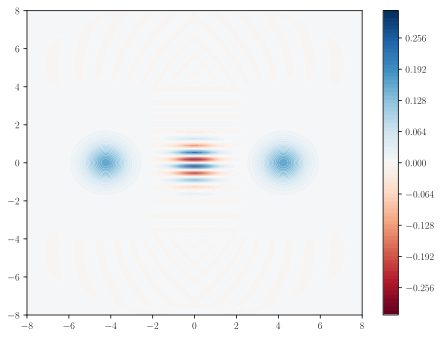

In [22]:
### Plot the Wigner function
import matplotlib as mpl
from matplotlib import cm

xvec = np.linspace(-8, 8, 300)
W_cat = wigner(psi_1, xvec, xvec)

wmap = wigner_cmap(W_cat)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(-W_cat.max(), W_cat.max())
plt.contourf(xvec, xvec, W_cat, 100, cmap=cm.RdBu, norm=nrm)
plt.colorbar()
plt.tight_layout()

### **d. [3 points]**  
Use QuTiP to calculate $\ket{\psi(t = \frac{\pi}{2\chi})}$ and plot its **Wigner function**.

---

In [23]:
psi_2 = (-1j * H * t1 / 2).expm() * psi_i
W_4leg = wigner(psi_2, xvec, xvec)

wmap = wigner_cmap(W_4leg)
nrm = mpl.colors.Normalize(-W_4leg.max(), W_4leg.max())
plt.contourf(xvec, xvec, W_4leg, 100, cmap=cm.RdBu, norm=nrm)
plt.colorbar()
plt.tight_layout()

### **e. [3 points]**  
After some **revival time** $t = T_{\text{rev}}$, your state $\ket{\psi(T_{\text{rev}})}$ will return to a **coherent state** $\ket{\beta}$.  

- Determine the **minimal** $T_{\text{rev}}$ that leads to this
- Report the corresponding $\beta$

---

In fact, $T_{\rm rev}=2\pi/\chi$. You can try to see that by generating a movie. Here let's verify this analytically.

$$
\begin{aligned}
|\psi(T_{\text{rev}})\rangle 
&= e^{-|\alpha|^2/2} \sum_{n=0}^{\infty} \frac{\alpha^n e^{-i \pi n^2}}{\sqrt{n!}} |n\rangle \\
&= e^{-|\alpha|^2/2} \sum_{n=0}^{\infty} \frac{\alpha^n (-1)^n}{\sqrt{n!}} |n\rangle \\
&= |-\alpha\rangle
\end{aligned}
$$

If you really want a rigorous demonstration, you may try the following. $|\psi(T_{\rm rev})\rangle$ is a coherent state means it is an eigenstate of $a$, therefore we have (*)

$$
\left|
\frac{
\langle \psi(T_{\text{rev}}) | \hat{a} | \psi(T_{\text{rev}}) \rangle
}{
\sqrt{\langle \psi(T_{\text{rev}}) | \psi(T_{\text{rev}}) \rangle \cdot \langle \psi | \hat{a}^\dagger \hat{a} | \psi \rangle}
}
\right|=1
$$

Denote $\theta = \frac{\chi T_{\text{rev}}}{2}$, and it is easy to see that

$$
\left\{
\begin{aligned}
\langle \psi | \psi \rangle &= 1, \qquad \\
\langle \psi | \hat{a}^\dagger \hat{a} | \psi \rangle &= |\alpha|^2.
\end{aligned}\right.
$$

We now compute the expectation value:

$$
\langle \psi | \hat{a} | \psi \rangle 
= e^{-|\alpha|^2} \sum_{n=0}^{\infty} \frac{|\alpha|^{2n} \cdot \alpha}{n!} e^{-i\theta (2n+1)}
$$

$$
= e^{-|\alpha|^2} \cdot \alpha e^{-i\theta} \cdot \exp \left( |\alpha|^2 e^{-2i\theta} \right)
$$

In order to fulfill the condition (*), $\theta$ has to be

$$
\theta = k\pi \quad (k \in \mathbb{N})
$$

So the minimal revival time is:

$$
T_{\text{rev}} = \frac{2\pi}{\chi}
$$

**Let's create a movie of the dynamics!** (Which will generate a file named `movie.mp4`)

May take several minutes to run.

In [ ]:
from matplotlib import cm
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from qutip import sesolve, wigner

# --- Setup your simulation ---
tlist = np.linspace(0, 4 * np.pi / chi, 200)
xvec = np.linspace(-8.0, 8.0, 100)
X, Y = np.meshgrid(xvec, xvec)

result = sesolve(H, psi_i, tlist)

# --- Plot setup ---
plt.rcParams["animation.embed_limit"] = (
    25 * 1024 * 1024
)  # default is 25MB, you can increase this limit if needed
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection="3d", azim=-107, elev=49)

# Pre-allocate for animation
cb = [None]  # use mutable object to work around closure
surf = [None]  # same idea


def init():
    ax.clear()
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-0.25, 0.25)
    ax.set_axis_off()
    return []


def animate(n):
    ax.clear()
    W = wigner(result.states[n], xvec, xvec)
    surf[0] = ax.plot_surface(
        X,
        Y,
        W,
        rstride=1,
        cstride=1,
        cmap=cm.jet,
        alpha=1.0,
        linewidth=0.05,
        vmax=0.25,
        vmin=-0.25,
    )
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-0.25, 0.25)
    ax.set_axis_off()

    # Only add colorbar once
    if cb[0] is None:
        cb[0] = fig.colorbar(surf[0], shrink=0.65, aspect=20)

    return [surf[0]]


# --- Build animation ---
num_frames_to_render = (
    40  # Render only the first 40 frames, you can change this to larger number
)
anim = FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=max(
        num_frames_to_render, len(result.states)
    ),  # you can change this from `min` to `max` to render all frames
    interval=50,
    blit=False,
)

# --- Display inline in Jupyter ---
HTML(anim.to_jshtml())

!!! info "large file size omitted"

    The output animation file for this code block is not included here due to its large size. However, you can run the code to generate it yourself.